In [12]:
from cfl.experiment import Experiment
import numpy as np
import pandas as pd
from cfl.visualization.basic_visualizations import visualize_macrostates
from sklearn.preprocessing import StandardScaler
from cfl_helpers import *

In [13]:
resolution = '10km'
n_clusters = 10
train_file = f'data/{resolution}_data.csv'
truth_file = f'data/{resolution}_truth.csv'

train_data = pd.read_csv(train_file)
Xraw = np.array(train_data[['lat', 'long']])
Yraw = np.array(train_data['generated_temp']).reshape(-1,1)
print(Xraw.shape, Yraw.shape)

truth = pd.read_csv(truth_file)
true_alt, true_temp = get_alt_temp_grids(truth)

(12700, 2) (12700, 1)


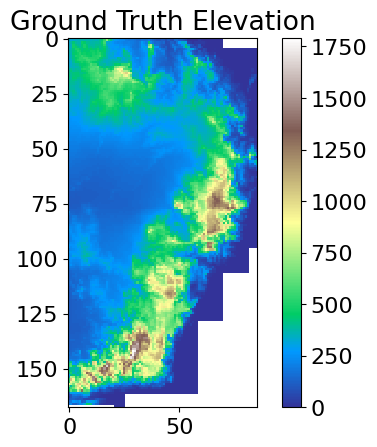

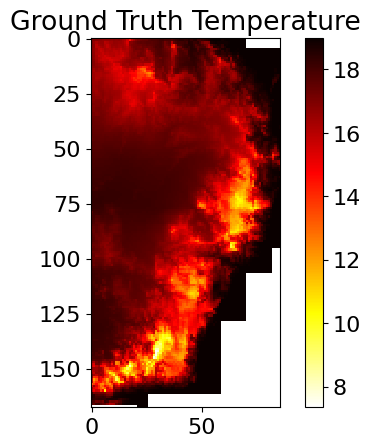

In [14]:
# PLOT TEMP AND ELEVATION FOR RAW DATAFRAME
plt.figure(1)
plt.imshow(true_alt, cmap='terrain', interpolation='nearest')
plt.colorbar()
plt.title('Ground Truth Elevation')
plt.show()

plt.figure(2)
plt.imshow(true_temp, cmap='hot_r', interpolation='nearest')
plt.colorbar()
plt.title('Ground Truth Temperature')
plt.show()

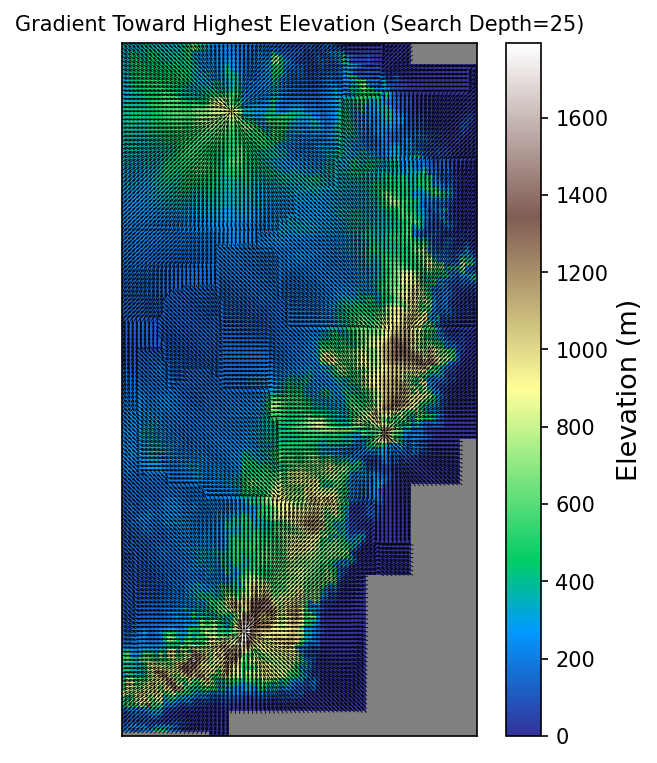

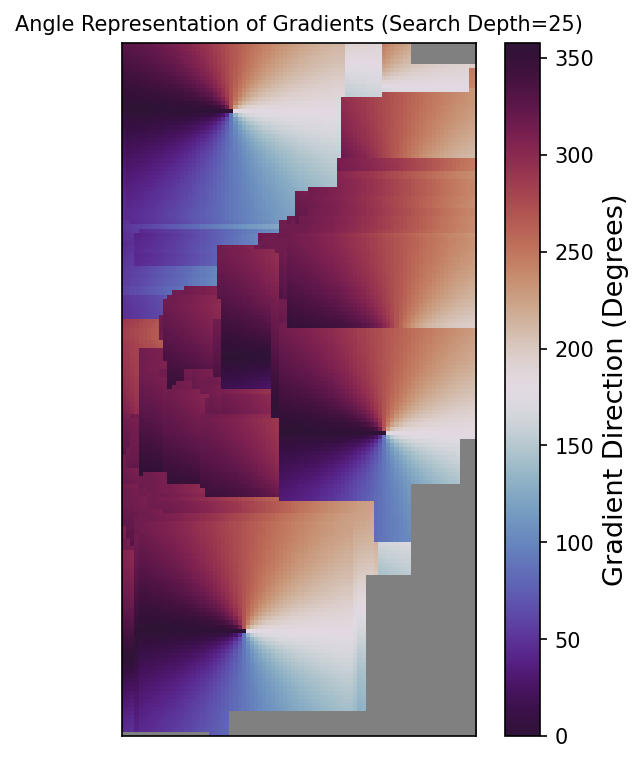

In [18]:
data = true_alt
d = 25
nan_val = -100

U, V = gen_elevation_grads(data, d, nan_val=nan_val)
angles = grad_angles(U, V, d)